## Visualize .nii.gz

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

In [38]:
file_list = [
    '/home/una/PRML-repro/snapshot/LA_mine_16_labeled/mine3d_v1_predictions/10_img.nii.gz',
    '/home/una/PRML-repro/snapshot/LA_mine_16_labeled/mine3d_v1_predictions/10_gt.nii.gz',
    '/home/una/PRML-repro/snapshot/LA_mine_16_labeled/mine3d_v1_predictions/10_pred_1.nii.gz',
    '/home/una/PRML-repro/snapshot/LA_mine_16_labeled/mine3d_v1_predictions/10_scores.nii.gz'
]

In [16]:

def visualize_named_4_nifti(filepaths, axis='axial'):
    """
    4개의 NIfTI 파일(Input, GT, Prediction, Score)을 한 행으로 시각화하고,
    각 이미지 상단에 이름을 붙여 Notebook에서 출력

    Parameters:
    - filepaths: .nii.gz 파일 경로 리스트 (길이 4)
    - axis: 'axial', 'sagittal', 'coronal'
    """
    assert len(filepaths) == 4, "filepaths에는 4개의 .nii.gz 경로가 필요합니다."

    titles = ['Input', 'GT', 'Prediction', 'Score']

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    for i, (path, title) in enumerate(zip(filepaths, titles)):
        img = nib.load(path)
        data = img.get_fdata()

        # 중심 슬라이스 선택
        if axis == 'axial':
            idx = data.shape[2] // 2
            slice_img = data[:, :, idx]
        elif axis == 'sagittal':
            idx = data.shape[0] // 2
            slice_img = data[idx, :, :]
        elif axis == 'coronal':
            idx = data.shape[1] // 2
            slice_img = data[:, idx, :]
        else:
            raise ValueError("axis must be 'axial', 'sagittal', or 'coronal'")

        axes[i].imshow(np.rot90(slice_img), cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(title, fontsize=14)

    plt.tight_layout()
    plt.show()

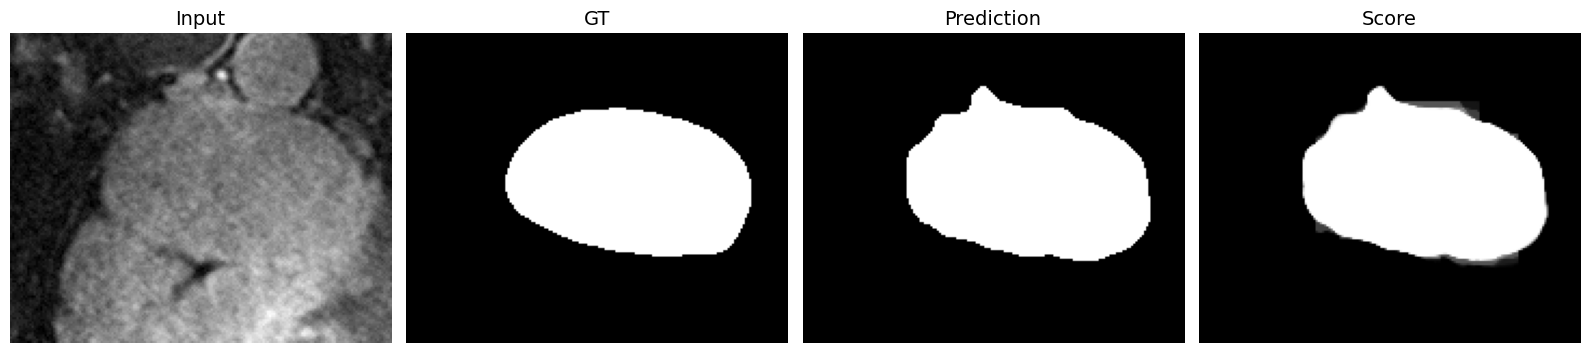

In [39]:
visualize_named_4_nifti(file_list, axis='axial')